In [1]:
import tensorflow as tf

In [3]:
from tensorflow.keras import layers, models

In [5]:
from tensorflow.keras.datasets import mnist

# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))
train_images, test_images = train_images / 255.0, test_images / 255.0

# Create a CNN model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')


11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/5
1875/1875 [==============================] - 67s 35ms/step - loss: 0.1439 - accuracy: 0.9559 - val_loss: 0.0599 - val_accuracy: 0.9816
Epoch 2/5
1875/1875 [==============================] - 64s 34ms/step - loss: 0.0469 - accuracy: 0.9852 - val_loss: 0.0390 - val_accuracy: 0.9883
Epoch 3/5
1875/1875 [==============================] - 64s 34ms/step - loss: 0.0328 - accuracy: 0.9897 - val_loss: 0.0347 - val_accuracy: 0.9899
Epoch 4/5
1875/1875 [==============================] - 64s 34ms/step - loss: 0.0256 - accuracy: 0.9918 - val_loss: 0.0299 - val_accuracy: 0.9904
Epoch 5/5
313/313 [==============================] - 3s 9ms/step - loss: 0.0282 - accuracy: 0.9906
Test accuracy: 0.9905999898910522


In [12]:
# Assuming you've already trained the model (as in the previous code) # Make predictions on test images predictions = model.predict(test_images) # The predictions will be an array of probabilities for each class (0-9) # You can get the predicted class for each image like this: predicted_classes = [tf.argmax(prediction) for prediction in predictions] # Compare the predicted classes to the true labels correct_predictions = sum(predicted_classes[i] == test_labels[i] for i in range(len(test_labels))) accuracy = correct_predictions / len(test_labels) print(f"Accuracy on test set: {accuracy * 100:.2f}%")

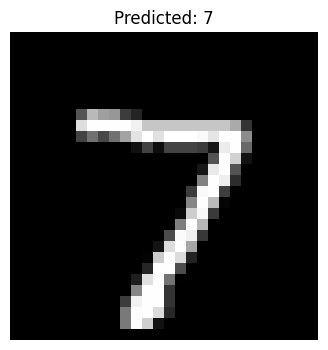

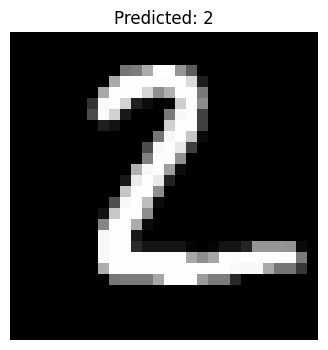

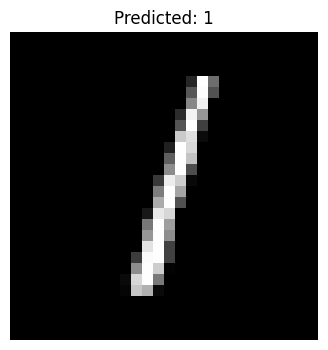

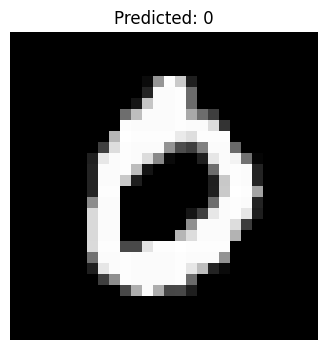

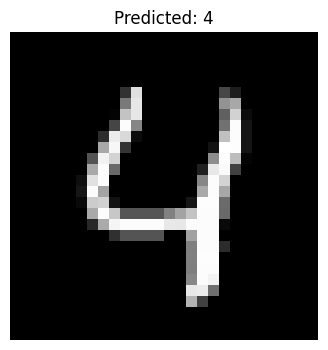

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you've already trained the model and made predictions (as in the previous code)

# Display a few test images with their predicted labels
num_images_to_display = 5 # Choose the number of images to display

for i in range(num_images_to_display):
    plt.figure(figsize=(4, 4)) # Adjust the figure size as needed
    plt.imshow(np.squeeze(test_images[i]), cmap='gray') # Display the test image
    plt.title(f"Predicted: {predicted_classes[i]}") # Display the predicted label
    plt.axis('off') # Turn off the axis
    plt.show()